# Importation des données

## Import (librairies)

In [ ]:
pip install dbfread

In [ ]:
import geopandas as gpd
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from dbfread import DBF
from os import listdir
from os.path import isfile, join
from shapely import line_merge, MultiLineString
from shapely.geometry import Point, MultiPoint
from shapely.geometry import Polygon, MultiPolygon
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Chargement Données

In [ ]:
Chemin_Donnees : str = "/content/drive/MyDrive/PIP2025_G8/Donnees/DonneesBrutes/Trafic/2018/"

In [ ]:
import geopandas as gpd

gdf = gpd.read_file(Chemin_Donnees + 'TMJA2018.shp')

In [ ]:
#Charger le DBF qui contient les données
chemin_dbf = Chemin_Donnees + "TMJA2018.dbf"
dbf_data = DBF(chemin_dbf, load=True)

#Convertir en dataframe pandas
df = pd.DataFrame(iter(dbf_data))

df.head()

dateRefere  route  longueur prD depPrD concession   absD  cumulD  \
0  2015-01-01  A0001    2380.0   0     93          N    0.0     0.0   
1  2015-01-01  A0001      60.0   2     93          N  400.0  2380.0   
2  2015-01-01  A0001     785.2   2     93          N  460.0  2440.0   
3  2015-01-01  A0001     401.8   3     93          N  248.2  3225.2   
4  2015-01-01  A0001     460.0   3     93          N  650.0  3627.0   

          xD          yD  ...   absF  cumulF         xF          yF   zF  \
0  653006.60  6867037.55  ...  400.0  2380.0  652899.42  6869409.49  0.0   
1  652899.42  6869409.49  ...  460.0  2440.0  652896.51  6869469.21  0.0   
2  652896.51  6869469.21  ...  248.2  3225.2  653176.46  6870095.57  0.0   
3  653176.46  6870095.57  ...  650.0  3627.0  653552.97  6870234.42  0.0   
4  653552.97  6870234.42  ...  100.0  4087.0  653980.05  6870405.69  0.0   

   anneeMesur  typeCompta         typeComp_1    tmja  pctPL  
0        2015           1  Permanent horaire  174890    0.0  
1        2015           1  Permanent horaire  134000    0.0  
2        2015           1  Permanent horaire  134000    0.0  
3        2015           1  Permanent horaire  134000    0.0  
4        2015           1  Permanent horaire  134000    0.0  

[5 rows x 24 columns]

In [ ]:
#df.columns
#df.loc[df["concession"] != df["concessi_1"], ["concession", "concessi_1"]]
from collections import Counter
Counter(df["typeComp_1"]).values()

dict_values([3712, 491, 1113])

# Création des CSV pour chaque années

In [ ]:
import os
import geopandas as gpd
import pandas as pd

Chemin_Donnees = "/content/drive/MyDrive/PIP2025_G8/Donnees/DonneesBrutes/Trafic/"

colonnes_a_conserver = [
    'dateRefere', 'route', 'longueur', 'prD', 'depPrD', 'concession',
    'xD', 'yD', 'prF', 'depPrF', 'absF', 'cumulF', 'xF', 'yF',
    'anneeMesur', 'typeCompta', 'typeComp_1', 'TMJA', 'ratio_PL', 'geometry', 'tmja', 'pctPL'
]

#On boucle sur chaque année
for annee in range(2007, 2020):
    dossier_annee = os.path.join(Chemin_Donnees, str(annee))

    fichier_shp = None
    for fichier in os.listdir(dossier_annee):
        if fichier.endswith(".shp"): #Récupérer le fichier shp (car noms de fichiers différents)
            fichier_shp = os.path.join(dossier_annee, fichier)
            break

    if not fichier_shp:
        print(f"Aucun fichier .shp trouvé pour l'année {annee}")
        continue

    gdf = gpd.read_file(fichier_shp)
    #Résolution des différences de noms de colonnes suivant les fichiers
    if 'anneeMesur' in gdf.columns:
        gdf['anneeMesur'] = annee
    if 'typeCompta' in gdf.columns:
        gdf['typeCompta'] = gdf['typeCompta'].replace("", pd.NA)
    if 'typeComp_1' in gdf.columns:
        gdf['typeComp_1'] = gdf['typeComp_1'].replace("", pd.NA)
    if 'tmja' in gdf.columns:
        gdf['tmja'] = gdf['tmja'].replace(0, pd.NA)
    if 'TMJA' in gdf.columns:
        gdf['TMJA'] = gdf['TMJA'].replace(0, pd.NA)

    colonnes_presentes = [col for col in colonnes_a_conserver if col in gdf.columns]
    gdf_filtre = gdf[colonnes_presentes]

    fichier_csv = os.path.join(dossier_annee, f"TMJA_{annee}.csv")

    gdf_filtre.to_csv(fichier_csv, index=False)

    print(f"Fichier CSV sauvegardé pour l'année {annee} ")


Fichier CSV sauvegardé pour l'année 2007 
Fichier CSV sauvegardé pour l'année 2008 
Fichier CSV sauvegardé pour l'année 2009 
Fichier CSV sauvegardé pour l'année 2010 
Fichier CSV sauvegardé pour l'année 2011 
Fichier CSV sauvegardé pour l'année 2012 
Fichier CSV sauvegardé pour l'année 2013 
Fichier CSV sauvegardé pour l'année 2014 
Fichier CSV sauvegardé pour l'année 2015 
Fichier CSV sauvegardé pour l'année 2016 
Fichier CSV sauvegardé pour l'année 2017 
Fichier CSV sauvegardé pour l'année 2018 
Fichier CSV sauvegardé pour l'année 2019 


# Cartographie de TMJA pour chaque année (exploration de données)

KeyError: 'tmja'

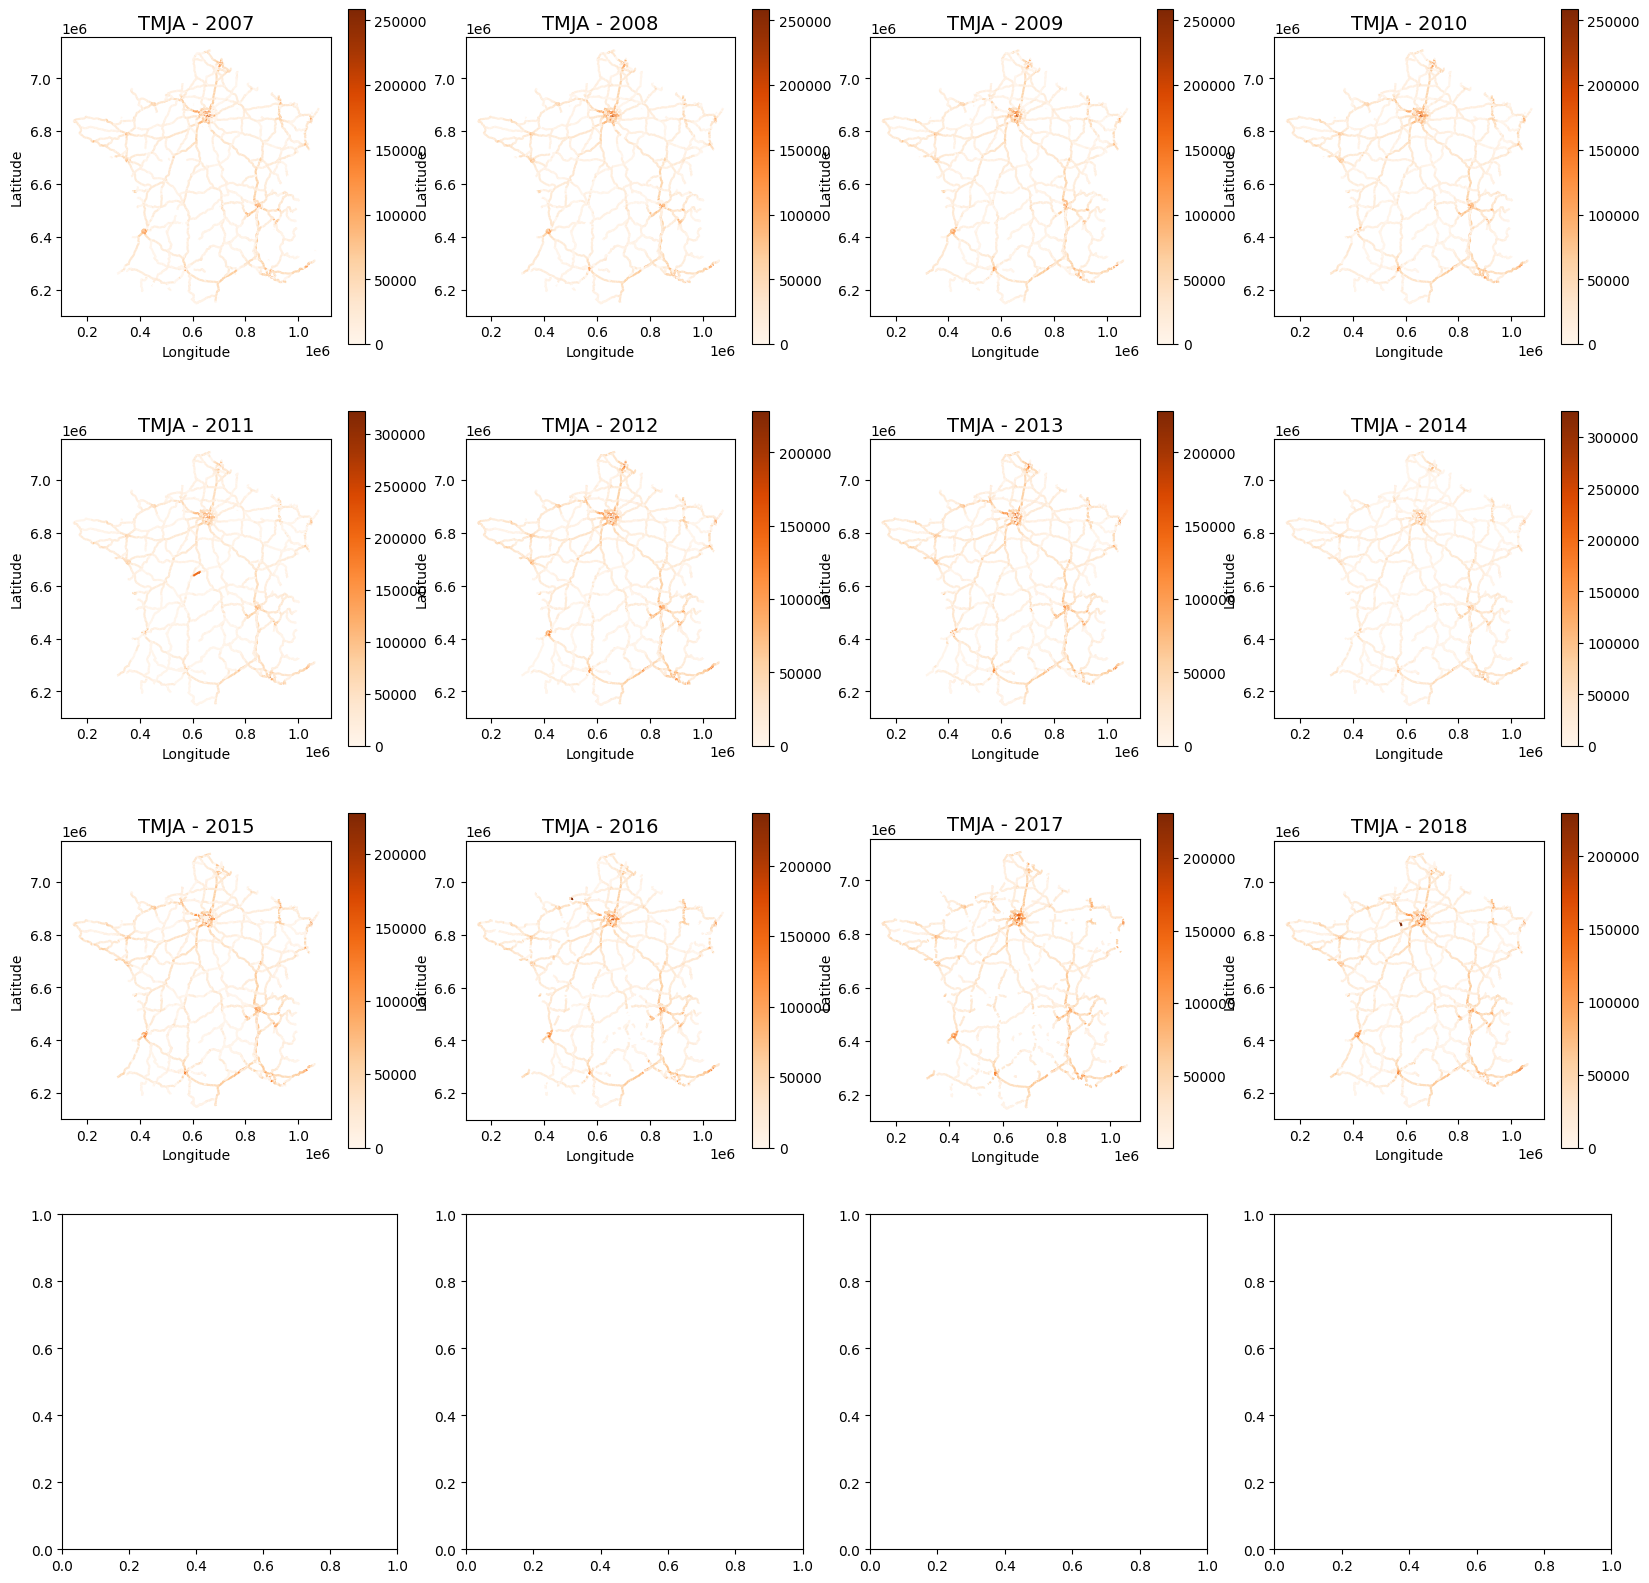

In [ ]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

# Chemin de base des données
Chemin_Donnees = "/content/drive/MyDrive/PIP2025_G8/Donnees/DonneesBrutes/Trafic/"

# Liste pour stocker le nombre de lignes par année
nombre_lignes_par_annee = []

# Créer une figure pour les sous-graphiques
fig, axs = plt.subplots(4, 4, figsize=(20, 20))  # Une grille de 4x4 pour les graphiques (2007 à 2019)
axs = axs.flatten()  # Aplatir pour un accès linéaire aux axes

# Parcourir les années et tracer les graphiques
for i, annee in enumerate(range(2007, 2020)):
    dossier_annee = os.path.join(Chemin_Donnees, str(annee))

    fichier_shp = None
    for fichier in os.listdir(dossier_annee):
        if fichier.endswith(".shp"):
            fichier_shp = os.path.join(dossier_annee, fichier)
            break

    if not fichier_shp:
        print(f"Aucun fichier .shp trouvé pour l'année {annee}")
        nombre_lignes_par_annee.append((annee, 0))
        axs[i].axis('off')  # Désactiver l'axe si aucun fichier trouvé
        continue

    # Charger le shapefile
    gdf = gpd.read_file(fichier_shp)
    nombre_lignes = len(gdf)
    nombre_lignes_par_annee.append((annee, nombre_lignes))

    # Tracer le graphique
    gdf.plot(column='tmja',  # Colonne contenant le TMJA
             legend=True,
             cmap='Oranges',
             ax=axs[i])

    # Ajouter les titres
    axs[i].set_title(f"TMJA - {annee}", fontsize=14)
    axs[i].set_xlabel("Longitude")
    axs[i].set_ylabel("Latitude")

# Ajuster les espacements
plt.tight_layout()

# Afficher la grille
plt.show()

# Afficher le nombre de lignes par année
for annee, lignes in nombre_lignes_par_annee:
    print(f"Année {annee} : {lignes} lignes")


#Tests et vérifications (inutiles)

In [ ]:

import os

# Chemin de base des données
Chemin_Donnees = "/content/drive/MyDrive/PIP2025_G8/Donnees/DonneesBrutes/Trafic/"

# Ensemble de colonnes de référence
colonnes_reference = None
mismatch_annees = {}

# Parcourir les années
for annee in range(2007, 2020):
    dossier_annee = os.path.join(Chemin_Donnees, str(annee))

    # Rechercher le fichier .dbf dans le dossier
    fichier_dbf = None
    for fichier in os.listdir(dossier_annee):
        if fichier.endswith(".dbf"):
            fichier_dbf = os.path.join(dossier_annee, fichier)
            break

    if not fichier_dbf:
        print(f"Aucun fichier .dbf trouvé pour l'année {annee}")
        continue


    gdf = DBF(fichier_dbf, load=True)
    df_annee = pd.DataFrame(iter(gdf))

    if colonnes_reference is None:
        colonnes_reference = set(df_annee.columns)


    colonnes_actuelles = set(df_annee.columns)
    if colonnes_actuelles != colonnes_reference:
        mismatch_annees[annee] = {
            "manquantes": colonnes_reference - colonnes_actuelles,
            "supplémentaires": colonnes_actuelles - colonnes_reference
        }
if mismatch_annees:
    print("Des différences ont été trouvées dans les colonnes des fichiers suivants :")
    for annee, differences in mismatch_annees.items():
        print(f"Année {annee} :")
        print(f" - Colonnes manquantes : {differences['manquantes']}")
        print(f" - Colonnes supplémentaires : {differences['supplémentaires']}")
else:
    print("Toutes les années ont les mêmes colonnes.")


Des différences ont été trouvées dans les colonnes des fichiers suivants :
Année 2009 :
 - Colonnes manquantes : {'cumulF'}
 - Colonnes supplémentaires : set()
Année 2016 :
 - Colonnes manquantes : set()
 - Colonnes supplémentaires : {'cote'}
Année 2017 :
 - Colonnes manquantes : {'typeCompta'}
 - Colonnes supplémentaires : set()
Année 2018 :
 - Colonnes manquantes : {'typeComp_1'}
 - Colonnes supplémentaires : {'cote'}
Année 2019 :
 - Colonnes manquantes : {'pctPL', 'tmja'}
 - Colonnes supplémentaires : {'ratio_PL', 'TMJA'}


In [ ]:
import dbf
import matplotlib.pyplot as plt
Chemin_Donnees = "/content/drive/MyDrive/PIP2025_G8/Donnees/DonneesBrutes/Trafic/"

nombre_lignes_par_annee = []

for annee in range(2007, 2020):
    dossier_annee = os.path.join(Chemin_Donnees, str(annee))

    fichier_dbf = None
    for fichier in os.listdir(dossier_annee):
        if fichier.endswith(".dbf"):
            fichier_dbf = os.path.join(dossier_annee, fichier)
            break

    if not fichier_dbf:
        print(f"Aucun fichier .dbf trouvé pour l'année {annee}")
        nombre_lignes_par_annee.append((annee, 0))
        continue
    table = gpd.read_file(fichier_dbf)
    nombre_lignes = len(table)
    nombre_lignes_par_annee.append((annee, nombre_lignes))


for annee, lignes in nombre_lignes_par_annee:
    print(f"Année {annee} : {lignes} lignes")

Année 2007 : 3571 lignes
Année 2008 : 3575 lignes
Année 2009 : 3549 lignes
Année 2010 : 3512 lignes
Année 2011 : 3386 lignes
Année 2012 : 5548 lignes
Année 2013 : 5484 lignes
Année 2014 : 5457 lignes
Année 2015 : 5316 lignes
Année 2016 : 5240 lignes
Année 2017 : 4354 lignes
Année 2018 : 5968 lignes
Année 2019 : 4695 lignes


In [ ]:

import os

# Chemin de base des données
Chemin_Donnees = "/content/drive/MyDrive/PIP2025_G8/Donnees/DonneesBrutes/Trafic/"

# Ensemble de colonnes de référence
colonnes_reference = None
nb_lignes_annees = {}

# Parcourir les années
for annee in range(2007, 2020):
    dossier_annee = os.path.join(Chemin_Donnees, str(annee))

    # Rechercher le fichier .dbf dans le dossier
    fichier_dbf = None
    for fichier in os.listdir(dossier_annee):
        if fichier.endswith(".dbf"):
            fichier_dbf = os.path.join(dossier_annee, fichier)
            break

    if not fichier_dbf:
        print(f"Aucun fichier .dbf trouvé pour l'année {annee}")
        continue


    gdf = DBF(fichier_dbf, load=True)
    df_annee = pd.DataFrame(iter(gdf))

    nb_lignes_annees[str(annee)] = len(df_annee)

# Afficher le nombre de lignes par année
for annee, nb_lignes in nb_lignes_annees.items():
    print(f"Année {annee} : {nb_lignes} lignes")


Année 2007 : 3571 lignes
Année 2008 : 3575 lignes
Année 2009 : 3549 lignes
Année 2010 : 3512 lignes
Année 2011 : 3386 lignes
Année 2012 : 5548 lignes
Année 2013 : 5484 lignes
Année 2014 : 5457 lignes
Année 2015 : 5316 lignes
Année 2016 : 5240 lignes
Année 2017 : 4354 lignes
Année 2018 : 5968 lignes
Année 2019 : 4695 lignes


In [ ]:
##Cleaning des données
import numpy as np
#Les années à 0 peuvent être considérées comme des valeurs manquantes
df.replace({'anneeMesur' : 0}, max(df['anneeMesur']), inplace=True)
#Dans typeCompta, il y a des valeurs vides qui ne sont pas comptabilisés en NA
df.replace({"typeCompta" : ""}, np.nan, inplace=True)
#Suppression des colonnes zF et zD qui n'ont que des valeurs nulles
df.drop(columns=['zF', 'zD'], inplace=True)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


print("Aperçu des premières lignes :")
print(df.head())

print("\nInformations générales sur les colonnes :")
print(df.info())

# Statistiques descriptives générales
print("\nStatistiques descriptives générales :")
print(df.describe(include='all'))

# Statistiques pour les colonnes numériques
print("\nStatistiques descriptives pour les colonnes numériques :")
stats_numeriques = df.describe()
print(stats_numeriques)

# Fréquence des valeurs pour les colonnes catégoriques
colonnes_categoriques = ['route', 'concession', 'typeCompta']
for col in colonnes_categoriques:
    print(f"\nFréquence des valeurs pour la colonne '{col}':")
    print(df[col].value_counts())

# Moyenne, médiane, maximum et minimum pour certaines colonnes
print("\nMoyenne et médiane pour TMJA :")
print("Moyenne TMJA :", df['tmja'].mean())
print("Médiane TMJA :", df['tmja'].median())

print("\nMaximum et Minimum pour TMJA et PctPL :")
print("TMJA Max :", df['tmja'].max())
print("TMJA Min :", df['tmja'].min())
print("PctPL Max :", df['pctPL'].max())
print("PctPL Min :", df['pctPL'].min())



Aperçu des premières lignes :
   dateRefere        route  longueur prD depPrD concession   absD  cumulD  \
0  2018-01-01      69D0301    6055.0   2     69          N -981.0     0.0   
1  2018-01-01      69D0383   13752.0   4     69          N -494.0     0.0   
2  2018-01-01  69D0383BPNL    2408.0   0     69          N    0.0     0.0   
3  2018-01-01     75000C01   35040.0   0     75          N    0.0     0.0   
4  2018-01-01     75000C02   35040.0   0     75          N    0.0     0.0   

          xD          yD  ...   absF   cumulF         xF          yF   zF  \
0  844036.84  6510806.45  ...   71.0   6055.0  849346.89  6509342.34  0.0   
1  846831.30  6522372.16  ...  544.0  13752.0  843537.87  6512429.80  0.0   
2  844982.46  6522772.27  ...  413.0   2408.0  846831.30  6522372.16  0.0   
3  655221.44  6858722.80  ...   40.0  35040.0  655221.44  6858722.80  0.0   
4  655227.28  6858703.75  ...   40.0  35040.0  655227.28  6858703.75  0.0   

   cote  anneeMesur  typeCompta  tmja pctPL 

In [ ]:

print(df['typeCompta'].isna().sum())

0


In [ ]:
#df['longueur'][]
#print(df['prD'][type(df['prD'])!])
import numpy as np

# Vérifier les valeurs uniques de chaque colonne pour détecter les possibles valeurs manquantes
print("\nVérification des valeurs uniques dans chaque colonne :")
for col in df.columns:
    print(f"Colonne '{col}':")
    print(df[col].unique())

# Définir des valeurs qui peuvent être considérées comme manquantes
valeurs_manquantes = ["", " ", "NULL", "N/A", "NaN", "-", "nan"]

# Remplacer les valeurs identifiées par NaN
df.replace(valeurs_manquantes, np.nan, inplace=True)

# Vérifier à nouveau la présence de valeurs manquantes
print("\nRésumé des valeurs manquantes par colonne après traitement :")
print(df.isnull().sum())

# Afficher un aperçu des données avec des valeurs manquantes (optionnel)
colonnes_manquantes = df.columns[df.isnull().any()].tolist()
print(f"\nColonnes avec valeurs manquantes : {colonnes_manquantes}")
print(df[colonnes_manquantes].head())




Vérification des valeurs uniques dans chaque colonne :
Colonne 'dateRefere':
[datetime.date(2018, 1, 1)]
Colonne 'route':
['69D0301' '69D0383' '69D0383BPNL' '75000C01' '75000C02' 'A0001' 'A0001A'
 'A0002' 'A0003' 'A0004' 'A0005' 'A0005A' 'A0006' 'A0006A' 'A0006B'
 'A0007' 'A0007N' 'A0008' 'A0009' 'A0010' 'A0011' 'A0012' 'A0013' 'A0014'
 'A0015' 'A0016' 'A0019' 'A0020' 'A0021' 'A0022' 'A0023' 'A0025' 'A0026'
 'A0027' 'A0028' 'A0029' 'A0030' 'A0031' 'A0033' 'A0034' 'A0035' 'A0036'
 'A0038' 'A0039' 'A0040' 'A0041' 'A0041N' 'A0042' 'A0043' 'A0046' 'A0047'
 'A0048' 'A0049' 'A0050' 'A0051' 'A0051N' 'A0052' 'A0054' 'A0055' 'A0057'
 'A0061' 'A0062' 'A0063' 'A0064' 'A0065' 'A0066' 'A0068' 'A0071' 'A0072'
 'A0075' 'A0077' 'A0081' 'A0082' 'A0083' 'A0084' 'A0085' 'A0086' 'A0087'
 'A0087N' 'A0088' 'A0089' 'A0103' 'A0104' 'A0105' 'A0106' 'A0115' 'A0126'
 'A0131' 'A0132' 'A0139' 'A0140' 'A0150' 'A0151' 'A0154' 'A0211' 'A0216'
 'A0304' 'A0311' 'A0313' 'A0314' 'A0315' 'A0320' 'A0330' 'A0340' 'A0344'
 

Système de projection : PROJCS["RGF93 Lambert 93",GEOGCS["RGF93 geographiques (dms)",DATUM["Reseau_Geodesique_Francais_1993_v1",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6171"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["IGNF","RGF93G"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",46.5],PARAMETER["central_meridian",3],PARAMETER["standard_parallel_1",44],PARAMETER["standard_parallel_2",49],PARAMETER["false_easting",700000],PARAMETER["false_northing",6600000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["IGNF","LAMB93"]]
Aperçu des données :   dateRefere        route  longueur prD depPrD concession   absD  cumulD  \
0 2018-01-01      69D0301    6055.0   2     69          N -981.0     0.0   
1 2018-01-01      69D0383   13752.0   4     69          N -494.0     0.0   
2 2018-01-01  69D0383BPNL    

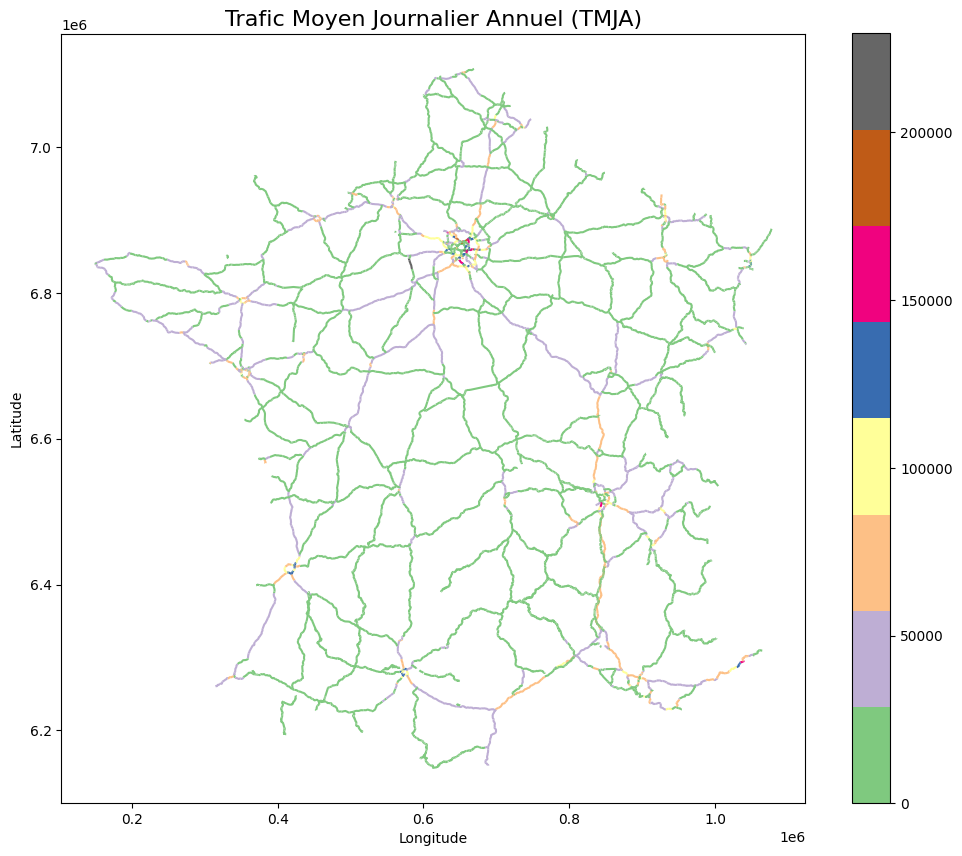

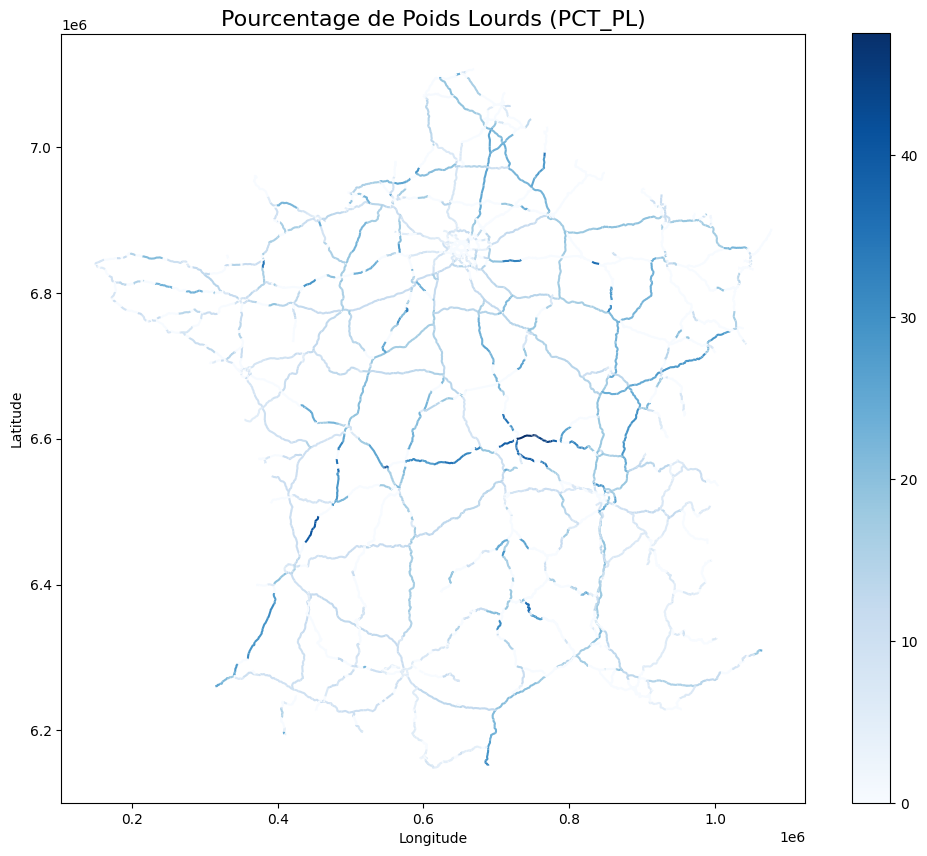

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
Chemin_Donnees : str = "/content/drive/MyDrive/PIP2025_G8/Donnees/DonneesBrutes/Trafic/2018/"
gdf = gpd.read_file(Chemin_Donnees + "TMJA2018.shp")

print("Système de projection :", gdf.crs)
print("Aperçu des données :", gdf.head())

fig, ax = plt.subplots(figsize=(12, 10))

gdf.plot(column='tmja',  #Colonne du .dbf, celle-ci contient le trafic moyen journalier annuel
         legend=True,
         cmap='Accent',
         ax=ax)

ax.set_title("Trafic Moyen Journalier Annuel (TMJA)", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()


fig, ax = plt.subplots(figsize=(12, 10))

gdf.plot(column='pctPL',  #Pourcentage de poids lourds
         legend=True,
         cmap='Blues',
         ax=ax)

ax.set_title("Pourcentage de Poids Lourds (PCT_PL)", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()
